# Assess the purity of peak calls based on different ranking methods
- unnormalized: CLIPper IP-only p-value (500 bp supralocal p-value)
- normalized: eCLIP vs SMInput; ABC vs total RNA-seq. Ranked based on how enriched the IP library is over the "background" (can be RNAseq/SMInput...)

- view as a classification scheme
- we know SLBP binds only histone stem loops
- label any peaks in histone genes as "TRUE"; 
- use '-log10pvalue' of each ranking method as the "classification score"
- calculate AURPC curve

In [1]:
from peak_benchmark import *
from plot_params import *

def is_histone(string):
    ''' based on genename, determine whether it is a histone gene'''
    if 'HIST' in string or string.startswith('H1') | string.startswith('H2') | string.startswith('H3') | string.startswith('H4'):
        return True
    else:
        return False

In [2]:


indir1 = '/home/hsher/scratch/nature2016_v35_peaks/output'
ids1 = [f.split('.')[0] for f in os.listdir(indir1) if f.endswith('annotate.bed') and 'SLBP' in f]

indir2 = '/home/hsher/scratch/downsample_peak_from_eclipse/output/'
ids2 = [f.split('.')[0] for f in os.listdir(indir2) if f.endswith('annotate.bed') and 'SLBP' in f and '262' not in f]

indir3 = '/home/hsher/scratch/katie_drosphila/output/'
ids3 = [f.split('.')[0] for f in os.listdir(indir3) if f.endswith('annotate.bed') and ('SLBP' in f or '262' in f)]

In [3]:
unnormed_data_dict = {}
normed_data_dict = {}

for id_, indir in zip([ids1, ids2, ids3], [indir1, indir2, indir3]):
#for id_, indir in zip([ids1, ids2], [indir1, indir2]):


    
    for i in id_:
        print(i)
        normed = read_annotated_peaks(os.path.join(indir, f'{i}.peaks.normed.compressed.annotate.bed'), normalized = True)
        unnormed = read_annotated_peaks(os.path.join(indir, 'CLIPper',f'{i}.peaks.annotate.bed'), normalized = False)
        
        # label
        normed['is_histone'] = normed['genename'].apply(is_histone)
        normed['is_histone_3utr'] = normed['is_histone'] & normed['region'].eq('3utr')
        
        unnormed['is_histone'] = unnormed['genename'].apply(is_histone)
        unnormed['is_histone_3utr'] = unnormed['is_histone'] & unnormed['region'].eq('3utr')
        
        unnormed_data_dict[i] = unnormed
        normed_data_dict[i] = normed
        
        

NATURE2016_SLBP_rep2
NATURE2016_SLBP_rep3
NATURE2016_SLBP_rep1
NATURE2016_SLBP_rep4
ENCODE_Dan_singleplex_K562_rep1_SLBP
Dan_singleplex_K562_rep2_SLBP
Dan_singleplex_K562_rep1_SLBP
ENCODE_katieoligo_SLBP_rep2
ENCODE_Dan_singleplex_K562_rep2_SLBP
ENCODE_katieoligo_SLBP_rep1
katieoligo_SLBP_rep2
262_02_SLBP
katieoligo_SLBP_rep1
katieoligo_SLBP_V5_rep2
262_01_SLBP
katieoligo_SLBP_V5_rep1


In [4]:
k562_data = ['262_01_SLBP',
 '262_02_SLBP',
    'ENCODE_Dan_singleplex_K562_rep1_SLBP',
    'ENCODE_Dan_singleplex_K562_rep2_SLBP',
 'Dan_singleplex_K562_rep1_SLBP',
 'Dan_singleplex_K562_rep2_SLBP']

hek_data = [
    'NATURE2016_SLBP_rep1',
    'NATURE2016_SLBP_rep2',
    'ENCODE_katieoligo_SLBP_rep1',
    'ENCODE_katieoligo_SLBP_rep2',
 'katieoligo_SLBP_V5_rep1',
 'katieoligo_SLBP_V5_rep2',
 'katieoligo_SLBP_rep1',
 'katieoligo_SLBP_rep2']

262_01_SLBP
262_02_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP1_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP2_SLBP


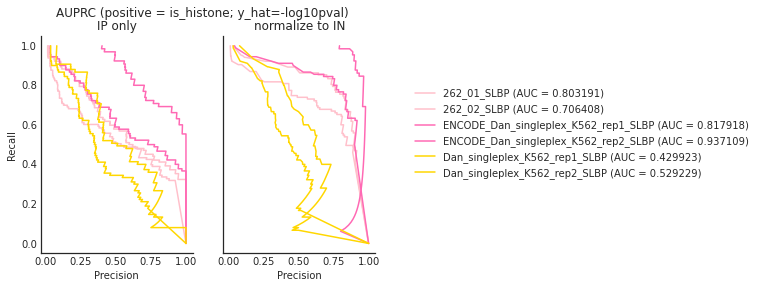

In [5]:
plot_PRC(unnormed_data_dict, normed_data_dict, dataset_to_plot = k562_data)

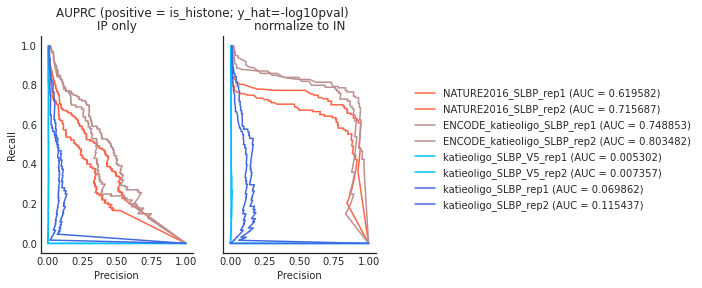

In [6]:
plot_PRC(unnormed_data_dict, normed_data_dict, dataset_to_plot = hek_data)

262_01_SLBP
262_01_SLBP
262_02_SLBP
262_02_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP1_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP1_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP2_SLBP
ENCODE_DAN_SINGLEPLEX_K562_REP2_SLBP


/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib

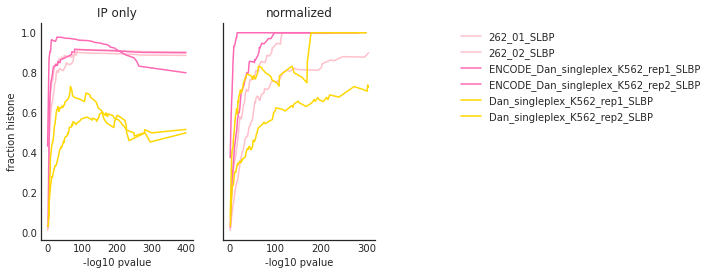

In [7]:
plot_CDF(unnormed_data_dict, normed_data_dict, dataset_to_plot = k562_data)

/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/hsher/miniconda3/envs/Metadensity/lib

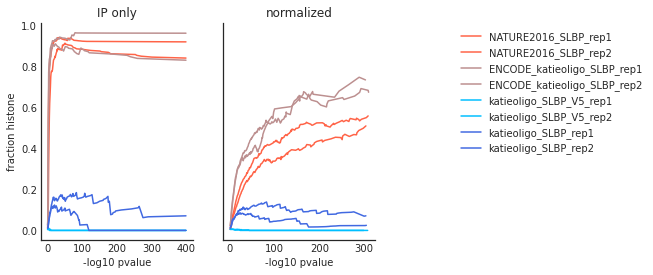

In [8]:
plot_CDF(unnormed_data_dict, normed_data_dict, dataset_to_plot = hek_data)

# Assess read level purity

In [9]:
import pandas as pd
import sys
sys.path.append('/home/hsher/Metadensity/scripts/')
from dataloader import *
from pybedtools import BedTool
encode_data = pd.read_csv('ENCODE_reprocess.csv')
all_data = pd.read_csv('all_data.csv', index_col = 0)
full = pd.read_csv('nature2016_hek_full.csv', index_col = 0)
encode_slbp = encode_data.loc[encode_data['RBP']=='SLBP']
encode_rbfox2 = encode_data.loc[encode_data['RBP']=='RBFOX2'] # just to compare
dan_rbfox2 = all_data.loc[(all_data['uid'].str.contains('Dan_singleplex_K562_rep'))&
            (all_data['uid'].str.contains('RBFOX2'))&
            (~all_data['uid'].str.contains('ENCODE'))]
katie_rbfox2 = all_data.loc[(all_data['uid'].str.contains('katieoligo'))&
            (all_data['uid'].str.contains('RBFOX2'))&
            (~all_data['uid'].str.contains('ENCODE'))]

In [10]:
all_slbp = pd.concat([all_data.loc[all_data['uid'].str.contains('SLBP')],
                      encode_slbp,
                      encode_rbfox2,
                      full.loc[full['uid'].str.contains('SLBP')],
                      dan_rbfox2,
                      katie_rbfox2
                     ]).reset_index()
#all_slbp = all_slbp.loc[~all_slbp['uid'].str.contains('katie')]

In [11]:

annotation = BedTool('/home/hsher/gencode_coords/gencode.v35.basic.annotation.gff3')

In [12]:
histones = annotation.filter(lambda entry: entry[2]!='gene' and 
                      (entry['gene_name'].startswith('H1') or
                       entry['gene_name'].startswith('H2') or
                       entry['gene_name'].startswith('H3') or
                       entry['gene_name'].startswith('H4')
                      ) and entry['gene_type']=='protein_coding'
                        and entry[1]=='HAVANA'
                  ).saveas()

In [13]:
histone_read_count = histones.multicov(bams = all_slbp['bam_0'].tolist()
                                       , s = True).to_dataframe(names = ['chrom', 'source', 'feature', 'start', 'end', 
                                          'score', 'strand', 'frame', 'attributes']+
                               all_slbp['uid'].tolist())
histone_read_count['genename'] = histone_read_count['attributes'].str.split('gene_name=', expand = True)[1].str.split(
    ';', expand = True)[0]
histone_read_count.drop_duplicates(subset = ['feature', 'genename'], inplace = True)
histone_by_region = histone_read_count.groupby(by = 'feature').sum()[all_slbp['uid'].tolist()]

In [14]:
import pysam
def get_mapped_read(bamfile):
    try:
        f = pysam.AlignmentFile(bamfile, "rb")
    except:
        return 0
    return f.mapped
total_reads = all_slbp['bam_0'].apply(get_mapped_read)

In [15]:
total_reads.index = all_slbp['uid']
histone_by_region.loc['total_reads'] = total_reads
histone_by_region = histone_by_region.loc[['five_prime_UTR', 'CDS', 'three_prime_UTR', 'total_reads']]
regions = ['five_prime_UTR', 'CDS', 'three_prime_UTR']
perc_histone = histone_by_region.loc[regions].sum(axis = 0).div(histone_by_region.loc['total_reads'])
perc_histone_3utr = histone_by_region.loc['three_prime_UTR'].div(histone_by_region.loc['total_reads'])

/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


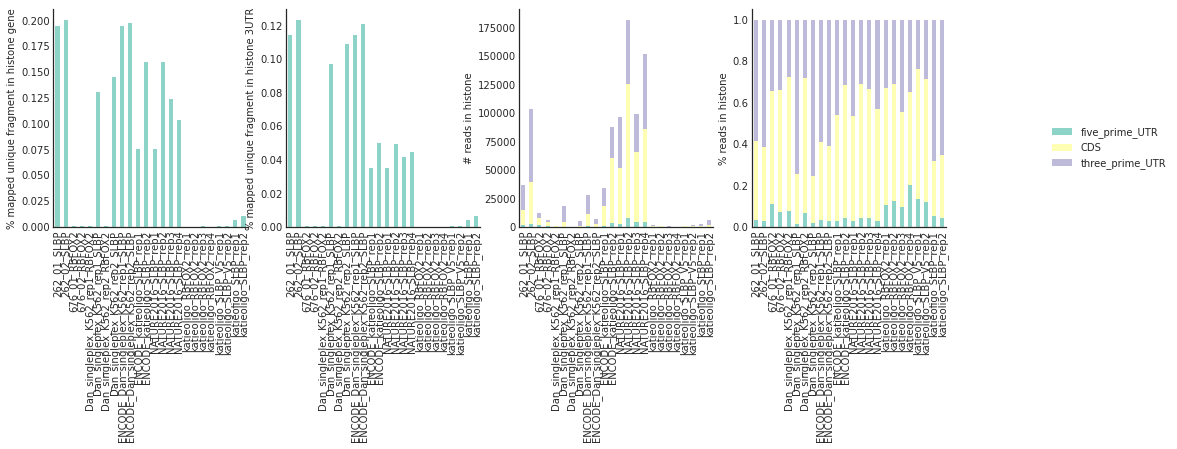

In [16]:
f, ax = plt.subplots(1,4, figsize = (16,4))
perc_histone.sort_index().plot.bar(ax = ax[0])
ax[0].set_ylabel('% mapped unique fragment in histone gene')

histone_by_region.loc[regions].T.sort_index().plot.bar(stacked = True, ax = ax[2], legend = False)


ax[2].set_ylabel('# reads in histone')

histone_by_region.loc[regions].div(histone_by_region.loc[regions].sum(axis = 0), axis = 1
                                  ).T.sort_index().plot.bar(stacked = True, ax = ax[3], )
ax[3].set_ylabel('% reads in histone')
ax[3].legend(bbox_to_anchor = (1.5, 0.5))

perc_histone_3utr.sort_index().plot.bar(ax = ax[1])
ax[1].set_ylabel('% mapped unique fragment in histone 3UTR')


sns.despine()


In [17]:
sub = ['Dan_singleplex_K562_rep1_SLBP', 'Dan_singleplex_K562_rep2_SLBP',
       '262_01_SLBP', '262_01_SLBP', '676_01_RBFOX2', '676_02_RBFOX2', 
       'Dan_singleplex_K562_rep1_RBFOX2', 'Dan_singleplex_K562_rep2_RBFOX2']
perc_histone.loc[sub]

Dan_singleplex_K562_rep1_SLBP      0.130504
Dan_singleplex_K562_rep2_SLBP      0.145044
262_01_SLBP                        0.194561
262_01_SLBP                        0.194561
676_01_RBFOX2                      0.001163
676_02_RBFOX2                      0.001036
Dan_singleplex_K562_rep1_RBFOX2    0.001038
Dan_singleplex_K562_rep2_RBFOX2    0.000913
dtype: float64

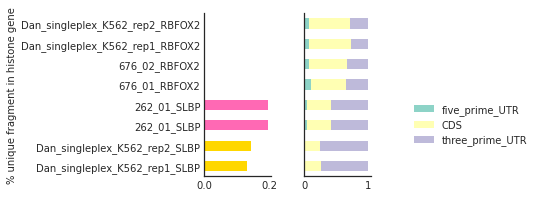

In [18]:
f, ax = plt.subplots(1,2, figsize = (3,3), sharey = True)

plt.subplots_adjust(wspace = 0.5)
sub = ['Dan_singleplex_K562_rep1_SLBP', 'Dan_singleplex_K562_rep2_SLBP',
       '262_01_SLBP', '262_01_SLBP', '676_01_RBFOX2', '676_02_RBFOX2', 
       'Dan_singleplex_K562_rep1_RBFOX2', 'Dan_singleplex_K562_rep2_RBFOX2']
colors = ['gold', 'gold', 'hotpink', 'hotpink', 'grey', 'grey', 'lightgrey', 'lightgrey']

perc_histone.loc[sub].plot.barh(ax = ax[0], color = colors)
ax[0].set_ylabel('% unique fragment in histone gene')

# histone_by_region.loc[regions].T.sort_index().loc[sub].plot.bar(stacked = True, ax = ax[2], legend = False)


# ax[2].set_ylabel('# reads in histone')

histone_by_region.loc[regions].div(histone_by_region.loc[regions].sum(axis = 0), axis = 1
                                  ).T.sort_index().loc[sub].plot.barh(stacked = True, ax = ax[1])
ax[1].set_ylabel('read distribution in histone')
ax[1].legend(bbox_to_anchor = (1.5, 0.5))

# perc_histone_3utr.loc[sub].sort_index().plot.bar(ax = ax[1])
# ax[1].set_ylabel('% unique fragment in histone 3UTR')


sns.despine()
#plt.tight_layout()""
plt.savefig(os.path.join(figdir, 'perc_UMI_in_histone.pdf'))

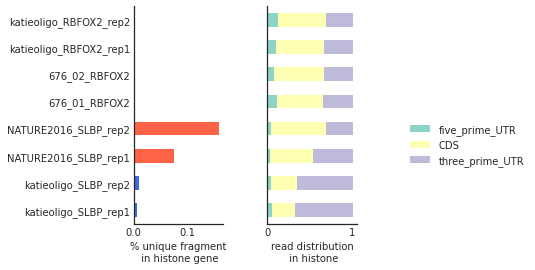

In [19]:
f, ax = plt.subplots(1,2, figsize = (4,4), sharey = True)

plt.subplots_adjust(wspace = 0.5)
sub = ['katieoligo_SLBP_rep1', 'katieoligo_SLBP_rep2',
       'NATURE2016_SLBP_rep1', 'NATURE2016_SLBP_rep2', 
       '676_01_RBFOX2', '676_02_RBFOX2',
      'katieoligo_RBFOX2_rep1', 'katieoligo_RBFOX2_rep2']
colors = ['royalblue', 'royalblue', 'tomato', 'tomato', 'grey', 'grey', 'lightgrey', 'lightgrey']

perc_histone.loc[sub].plot.barh(ax = ax[0], color = colors)
ax[0].set_xlabel('% unique fragment\n in histone gene')

# histone_by_region.loc[regions].T.sort_index().loc[sub].plot.bar(stacked = True, ax = ax[2], legend = False)


# ax[2].set_ylabel('# reads in histone')

histone_by_region.loc[regions].div(histone_by_region.loc[regions].sum(axis = 0), axis = 1
                                  ).T.sort_index().loc[sub].plot.barh(stacked = True, ax = ax[1])
ax[1].set_xlabel('read distribution\n in histone')
ax[1].legend(bbox_to_anchor = (1.5, 0.5))

# perc_histone_3utr.loc[sub].sort_index().plot.bar(ax = ax[1])
# ax[1].set_ylabel('% unique fragment in histone 3UTR')


sns.despine()
#plt.tight_layout()
plt.savefig(os.path.join(figdir, 'perc_UMI_in_histone_hek.pdf'))

In [20]:
perc_read_in_each = histone_read_count.loc[histone_read_count['feature']=='three_prime_UTR', ['genename']+all_slbp['uid'].tolist()].set_index('genename'
                                                                                                                                             ).div(histone_by_region.loc['total_reads'], axis = 1)

In [21]:
perc_read_in_each = perc_read_in_each.loc[perc_read_in_each.sum(axis = 1)>0]

In [22]:
detected = []
for thres in [10e-5, 5*10e-4, 10e-4, 5*10e-3, 10e-3, 10e-2]:
    n_histone_3utr=perc_read_in_each.ge(thres).sum(axis = 0)
    n_histone_3utr.name = thres
    detected.append(n_histone_3utr)

Text(0.5, 0, 'threshold (>% IP reads)')

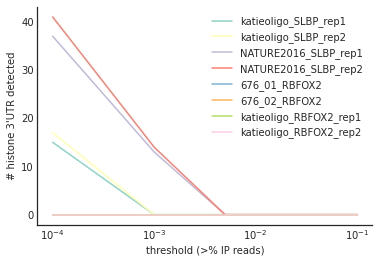

In [23]:
pd.concat(detected, axis = 1).loc[sub].T.sort_index().plot()
plt.xscale('log')
sns.despine()
plt.ylabel('# histone 3\'UTR detected')
plt.xlabel('threshold (>% IP reads)')

# what are the non-histone peaks

In [24]:
unique_histone_utr = BedTool.from_dataframe(histone_read_count.loc[histone_read_count['feature']=='three_prime_UTR', 
                                            ['chrom', 'start','end', 'genename','score', 'strand']
                                           ])


In [25]:
counts = []
for lib in normed_data_dict.keys():
    normed = normed_data_dict[lib]
    peak_bed = BedTool.from_dataframe(normed.loc[(normed['score']>3)&(normed['name']>3)])
    
    peak_is_hist = len(peak_bed.intersect(unique_histone_utr, s = True, u = True))
    hist_has_peak = len(unique_histone_utr.intersect(peak_bed, s = True, u = True))
    counts.append([lib, peak_is_hist, hist_has_peak, len(peak_bed)])

In [26]:
histone_count = pd.DataFrame(counts, columns = ['name', 'n_peak_utr', 'n_histone_utr', 'n_peak'])
histone_count['%peak is histone 3UTR'] = histone_count['n_peak_utr']/histone_count['n_peak']
histone_count['%3UTR histone detected'] = histone_count['n_histone_utr']/(len(unique_histone_utr))

In [27]:
histone_count.loc[histone_count['name'].isin(k562_data)
                 ].set_index('name').loc[k562_data
                ][['%3UTR histone detected']]

,%3UTR histone detected
name,
262_01_SLBP,0.580645
262_02_SLBP,0.623656
ENCODE_Dan_singleplex_K562_rep1_SLBP,0.569892
ENCODE_Dan_singleplex_K562_rep2_SLBP,0.526882
Dan_singleplex_K562_rep1_SLBP,0.537634
Dan_singleplex_K562_rep2_SLBP,0.505376


/home/hsher/miniconda3/envs/Metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


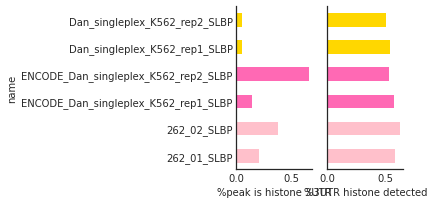

In [28]:
f, ax = plt.subplots(1,2, sharey = True, figsize = (3,3))
histone_count.loc[histone_count['name'].isin(k562_data)
                 ].set_index('name').loc[k562_data,'%peak is histone 3UTR'
                ].plot.barh(
    color  = ['pink']*2+['hotpink']*2+['gold']*2,
    ax = ax[0]
    )
ax[0].set_xlabel('%peak is histone 3UTR')
histone_count.loc[histone_count['name'].isin(k562_data)
                 ].set_index('name').loc[k562_data,'%3UTR histone detected'
                ].plot.barh(
    color  = ['pink']*2+['hotpink']*2+['gold']*2,
    ax = ax[1]
    )

sns.despine()
ax[1].set_xlabel('%3UTR histone detected')
plt.savefig(os.path.join(figdir, 'sigpeak_purity.pdf'))

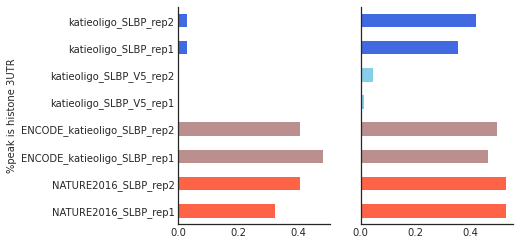

In [29]:
f, ax = plt.subplots(1,2, sharey = True)
hek_colors = ['tomato']*2 + ['rosybrown']*2 + ['skyblue']*2 +['royalblue']*2 
histone_count.loc[histone_count['name'].isin(hek_data)
                 ].set_index('name').loc[hek_data,'%peak is histone 3UTR'
                ].plot.barh(
    color  = hek_colors,
    ax = ax[0]
    )
ax[0].set_ylabel('%peak is histone 3UTR')
histone_count.loc[histone_count['name'].isin(hek_data)
                 ].set_index('name').loc[hek_data,'%3UTR histone detected'
                ].plot.barh(
    color  = hek_colors,
    ax = ax[1]
    )

sns.despine()
ax[1].set_ylabel('%3UTR histone detected')
plt.savefig(os.path.join(figdir, 'sigpeak_purity_hek.pdf'))

In [30]:
counts_unnorm = []
for lib in unnormed_data_dict.keys():
    unnormed = unnormed_data_dict[lib]
    peak_bed = BedTool.from_dataframe(unnormed.loc[(unnormed['-log10pval']>3)])
    
    peak_is_hist = len(peak_bed.intersect(unique_histone_utr, s = True, u = True))
    hist_has_peak = len(unique_histone_utr.intersect(peak_bed, s = True, u = True))
    counts_unnorm.append([lib, peak_is_hist, hist_has_peak, len(peak_bed)])

In [31]:
noise_peak_count = []

for lib in normed_data_dict.keys():
    normed = normed_data_dict[lib]
    filtered = normed.loc[(normed['score']>3)&(normed['name']>3)]
    
    non_histone_counts = filtered.loc[~filtered['is_histone'], 'region'].value_counts()
    
    noise_peak_count.append(non_histone_counts)
    
noise_peak_count  = pd.concat(noise_peak_count, axis = 1).fillna(0)
noise_peak_count.columns = list(normed_data_dict.keys())

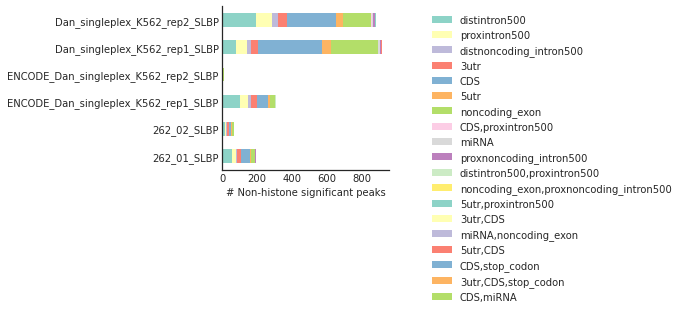

In [32]:
noise_peak_count[k562_data].T.plot.barh(stacked = True, figsize = (3,3))
plt.legend(bbox_to_anchor=(1.2,1))
sns.despine()
plt.xlabel('# Non-histone significant peaks')
plt.savefig(os.path.join(figdir, 'non-histone-peak.pdf'))

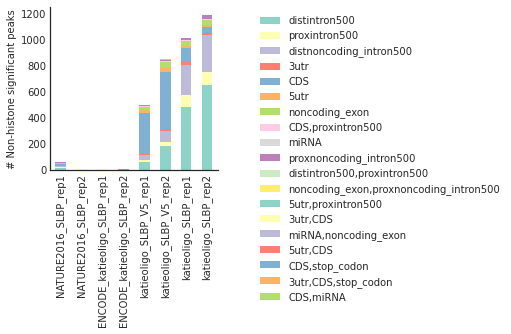

In [33]:
noise_peak_count[hek_data].T.plot.bar(stacked = True, figsize = (3,3))
plt.legend(bbox_to_anchor=(1.2,1))
sns.despine()
plt.ylabel('# Non-histone significant peaks')
plt.savefig(os.path.join(figdir, 'non-histone-peak_hek.pdf'))